In [3]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
data_size = 6517
data = pd.read_csv(f"data/processed_data/clean_data_{data_size}.csv")

In [6]:
data.head()

,price,city,state,usable_areas,total_areas,parking_spaces,suites,bathrooms,bedrooms,price_cat
0,850000,Rio de Janeiro,Rio de Janeiro,320,320,4,0,3,4,2
1,680000,São Paulo,São Paulo,140,150,2,1,3,3,2
2,590000,Campo Grande,Mato Grosso do Sul,120,254,2,1,2,3,2
3,300000,Piracicaba,São Paulo,400,400,4,4,5,4,1
4,380000,São José dos Campos,São Paulo,140,140,3,1,2,3,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["price", "city", "state", "price_cat"]),
    data["price"],
    test_size=0.2,
    random_state=42,
)

In [8]:
# Linear Regression
from sklearn.linear_model import LinearRegression


# SVR
from sklearn.svm import SVR

# XGBoost
from xgboost import XGBRegressor

# MLP Regressor
from sklearn.neural_network import MLPRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor

models = [
    LinearRegression(),
    SVR(),
    XGBRegressor(),
    MLPRegressor(),
    RandomForestRegressor(),
]

params = {
    type(LinearRegression()).__name__: {
        "fit_intercept": [True, False],
    },
    type(SVR()).__name__: {
        "kernel": ["poly", "rbf", "sigmoid"],
        "degree": [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "C": [0.1, 1, 10],
    },
    type(XGBRegressor()).__name__: {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5, 6, 7],
        "learning_rate": [0.01, 0.05, 0.1],
        "gamma": [0, 0.25, 1.0],
    },
    type(MLPRegressor()).__name__: {
        "hidden_layer_sizes": [(5, 3), (14, 7, 3), (140, 140, 140)],
        "activation": ["relu"],
        "n_iter_no_change": [50],
    },
    type(RandomForestRegressor()).__name__: {
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
    },
}

In [10]:
from sklearn.model_selection import GridSearchCV
import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.auto import tqdm
from sklearn.metrics import mean_absolute_error

# Perform cross-validation for each model
for model in tqdm(models, desc="Training"):
    print("Training %s\n" % type(model).__name__)
    model_name = type(model).__name__
    model_params = params[model_name]

    # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=model, param_grid=model_params, cv=5)

    # Fit the model and perform cross-validation
    grid_search.fit(X_train, y_train)

    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Calculate predictions
    y_pred = grid_search.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)

    mae = mean_absolute_error(y_test, y_pred)

    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best score for {model_name}: {best_score}")
    print(f"R2 score for {model_name}: {r2}")
    print(f"RMSE for {model_name}: {rmse}")
    print(f"Mae score for {model_name}: {mae}")

Training:  20%|██        | 1/5 [00:00<00:00,  9.66it/s]

Training LinearRegression

Best parameters for LinearRegression: {'fit_intercept': True}
Best score for LinearRegression: 0.3880394853909622
R2 score for LinearRegression: 0.4422683189895924
RMSE for LinearRegression: 352556.973504808
Mae score for LinearRegression: 245476.5305383989
Training SVR



Training:  40%|████      | 2/5 [05:54<10:24, 208.30s/it]

Best parameters for SVR: {'C': 10, 'degree': 4, 'kernel': 'poly'}
Best score for SVR: 0.10967377806549741
R2 score for SVR: 0.13671616598450664
RMSE for SVR: 438625.0757598504
Mae score for SVR: 291770.29109484545
Training XGBRegressor



Training:  60%|██████    | 3/5 [08:13<05:53, 176.66s/it]

Best parameters for XGBRegressor: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best score for XGBRegressor: 0.43663133086319317
R2 score for XGBRegressor: 0.5088786454926759
RMSE for XGBRegressor: 330834.7048570824
Mae score for XGBRegressor: 224477.89028949387
Training MLPRegressor



/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Best parameters for MLPRegressor: {'activation': 'relu', 'hidden_layer_sizes': (140, 140, 140), 'n_iter_no_change': 50}
Best score for MLPRegressor: 0.3810230501059916
R2 score for MLPRegressor: 0.43971373981100625
RMSE for MLPRegressor: 353363.45966553775
Mae score for MLPRegressor: 244241.33922647987
Training RandomForestRegressor



Training: 100%|██████████| 5/5 [18:28<00:00, 221.79s/it]

Best parameters for RandomForestRegressor: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score for RandomForestRegressor: 0.4523728539320893
R2 score for RandomForestRegressor: 0.5290008093481089
RMSE for RandomForestRegressor: 323986.36443164194
Mae score for RandomForestRegressor: 219115.66617211417


In [11]:
from sklearn.model_selection import GridSearchCV
import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.auto import tqdm
from sklearn.metrics import mean_absolute_error

# Perform cross-validation for each model
for model in tqdm(models, desc="Training"):
    print("Training %s\n" % type(model).__name__)
    model_name = type(model).__name__
    model_params = params[model_name]

    # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=model, param_grid=model_params, cv=5)

    # Fit the model and perform cross-validation
    grid_search.fit(X_train.head(100), y_train.head(100))

    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Calculate predictions
    y_pred = grid_search.predict(X_train.head(100))

    # Calculate R2 score
    r2 = r2_score(y_train.head(100), y_pred)

    mae = mean_absolute_error(y_train.head(100), y_pred)

    # Calculate RMSE
    mse = mean_squared_error(y_train.head(100), y_pred)
    rmse = np.sqrt(mse)

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best score for {model_name}: {best_score}")
    print(f"R2 score for {model_name}: {r2}")
    print(f"RMSE for {model_name}: {rmse}")
    print(f"Mae score for {model_name}: {mae}")

Training:  20%|██        | 1/5 [00:00<00:00,  8.70it/s]

Training LinearRegression

Best parameters for LinearRegression: {'fit_intercept': False}
Best score for LinearRegression: 0.07483640817340227
R2 score for LinearRegression: 0.1993968048440038
RMSE for LinearRegression: 363634.57541577006
Mae score for LinearRegression: 246706.70032979044
Training SVR



Training:  40%|████      | 2/5 [00:01<00:03,  1.12s/it]

Best parameters for SVR: {'C': 10, 'degree': 5, 'kernel': 'poly'}
Best score for SVR: -0.09337163930401945
R2 score for SVR: -0.06710523395411583
RMSE for SVR: 419817.1113010922
Mae score for SVR: 286332.2592690705
Training XGBRegressor



Training:  60%|██████    | 3/5 [01:22<01:15, 37.58s/it]

Best parameters for XGBRegressor: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best score for XGBRegressor: -0.07047309140865432
R2 score for XGBRegressor: 0.44208708828048837
RMSE for XGBRegressor: 303556.6260722426
Mae score for XGBRegressor: 199667.5903125
Training MLPRegressor



/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Best parameters for MLPRegressor: {'activation': 'relu', 'hidden_layer_sizes': (140, 140, 140), 'n_iter_no_change': 50}
Best score for MLPRegressor: -0.20536682595262637
R2 score for MLPRegressor: -0.04184117472725024
RMSE for MLPRegressor: 414817.6908435841
Mae score for MLPRegressor: 285095.5975999254
Training RandomForestRegressor



Training: 100%|██████████| 5/5 [04:26<00:00, 53.38s/it]

Best parameters for RandomForestRegressor: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
Best score for RandomForestRegressor: 0.017094667115568795
R2 score for RandomForestRegressor: 0.3795467887528975
RMSE for RandomForestRegressor: 320118.6887513734
Mae score for RandomForestRegressor: 225064.98593941148


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Train Mean Absolute Error:", mae_train)
    print("Train R2 Score:", r2_train)
    print(
        "Train Root Mean Squared Error:",
        rmse_train,
    )

    print("Test Mean Absolute Error:", mae_test)
    print("Test R2 Score:", r2_test)
    print(
        "Test Root Mean Squared Error:",
        rmse_test,
    )
    return (
        type(model).__name__,
        mae_train,
        mae_test,
        r2_train,
        r2_test,
        rmse_train,
        rmse_test,
    )

## Models 

In [32]:
results = []

### Linear Regression

- Linear regression assumes a linear relationship between the input features and the target variable.
- It fits a straight line to the data points that minimizes the distance between the predicted and actual values.
- It can be used for both regression (continuous target variable) and simple prediction tasks.
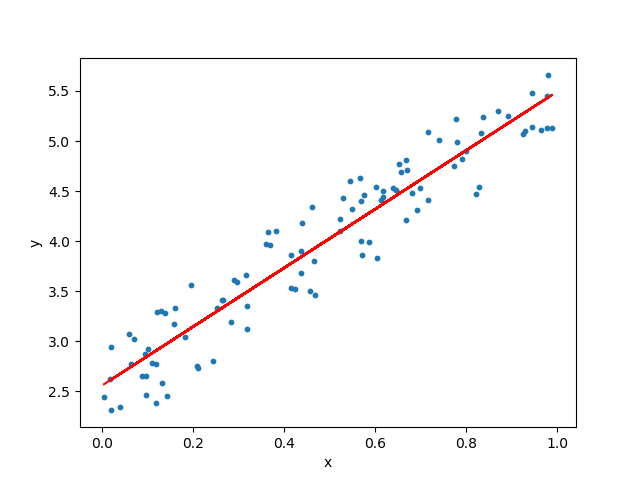

In [34]:
from sklearn.linear_model import LinearRegression

params = {"fit_intercept": False}
model = LinearRegression(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

Train Mean Absolute Error: 242840.36590607328
Train R2 Score: 0.3921912246026126
Train Root Mean Squared Error: 346920.8984019167
Test Mean Absolute Error: 244359.0649670263
Test R2 Score: 0.44450426526270415
Test Root Mean Squared Error: 351849.56334897224


### SVR

- SVR is an extension of support vector machines (SVM) for regression tasks.
- It aims to find a hyperplane that best fits the data, while minimizing the error within a certain margin (epsilon).
- It is effective for handling both linear and non-linear relationships in the data.
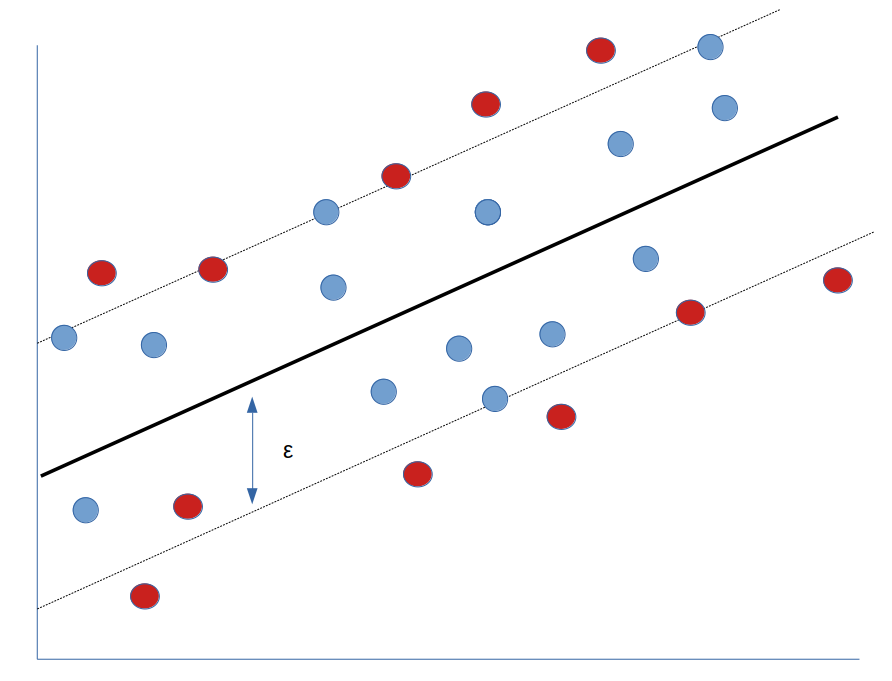

In [35]:
params = {"C": 10, "degree": 5, "kernel": "poly"}
model = SVR(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

Train Mean Absolute Error: 283134.03042403253
Train R2 Score: 0.10873291022755183
Train Root Mean Squared Error: 420098.29079217225
Test Mean Absolute Error: 294829.65629155055
Test R2 Score: 0.1197774574423297
Test Root Mean Squared Error: 442907.3581575854


### XGBoost

- XGBoost is a powerful gradient boosting algorithm for regression tasks.
- It combines multiple weak prediction models (decision trees) to make accurate predictions.
- It uses gradient descent optimization to iteratively improve the model's predictions by minimizing the loss function.

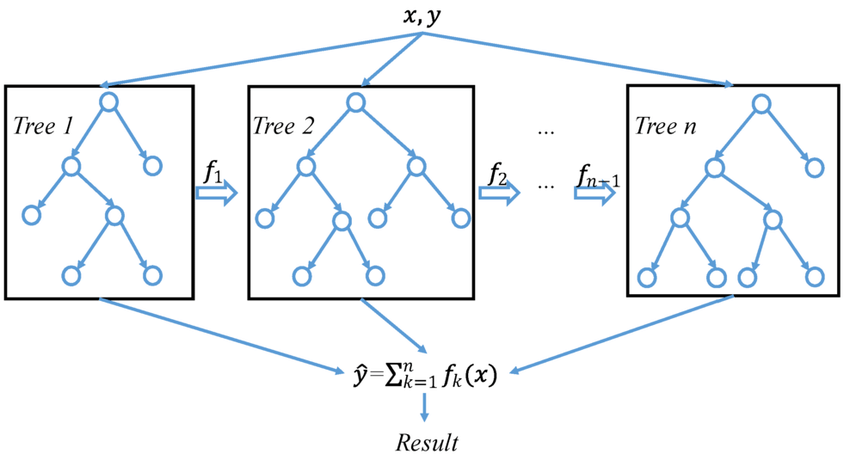

In [36]:
params = {"gamma": 0, "learning_rate": 0.01, "max_depth": 3, "n_estimators": 200}
model = XGBRegressor(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

Train Mean Absolute Error: 230402.9510238826
Train R2 Score: 0.3717103304678452
Train Root Mean Squared Error: 352717.4441685638
Test Mean Absolute Error: 240564.4463190184
Test R2 Score: 0.38296389038669243
Test Root Mean Squared Error: 370827.50757403736



### MLP Regressor

- MLPRegressor stands for Multi-Layer Perceptron regressor, which is a type of artificial neural network.
- It consists of multiple layers of interconnected nodes (neurons) that learn to map inputs to outputs.
- It is capable of capturing complex relationships between features and the target variable, making it suitable for a wide range of regression tasks.

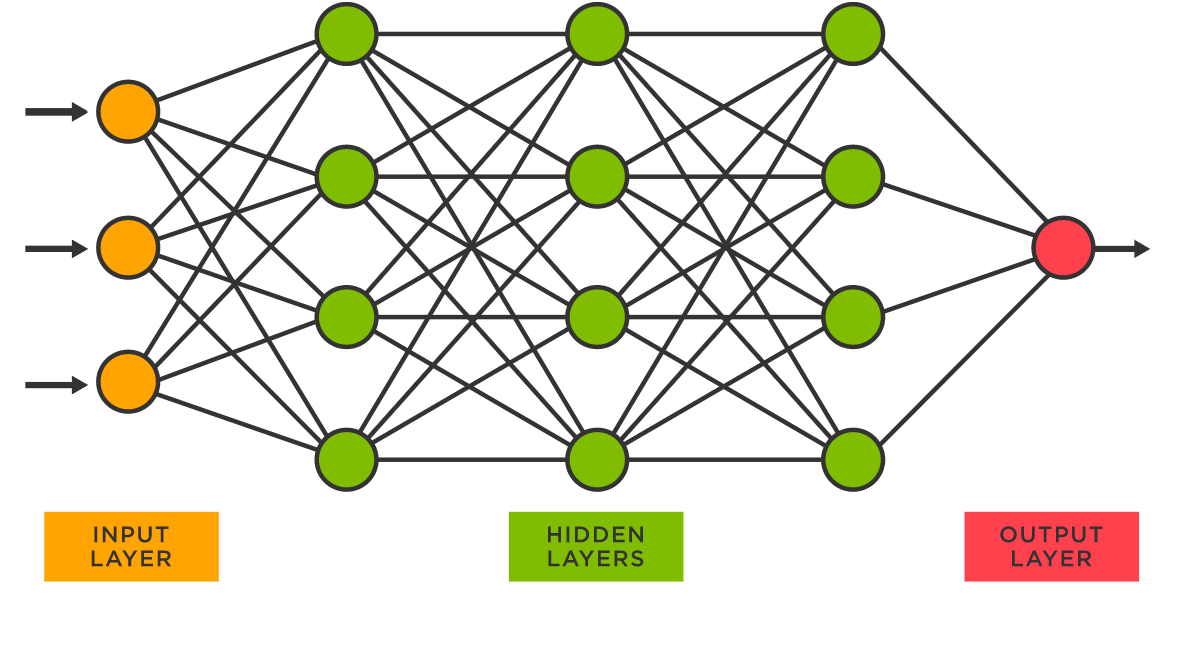

In [37]:
params = {
    "activation": "relu",
    "hidden_layer_sizes": (140, 140, 140),
    "n_iter_no_change": 50,
}
model = MLPRegressor(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Mean Absolute Error: 242557.90079187104
Train R2 Score: 0.3894609591378385
Train Root Mean Squared Error: 347699.20638545597
Test Mean Absolute Error: 244766.8238108449
Test R2 Score: 0.43902324169985596
Test Root Mean Squared Error: 353581.1356014917


/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Random Forest

- RandomForestRegressor is an ensemble learning method based on decision trees.
- It constructs multiple decision trees and combines their predictions to obtain a more accurate result.
- It leverages the concept of random feature selection and bagging to reduce overfitting and improve generalization.
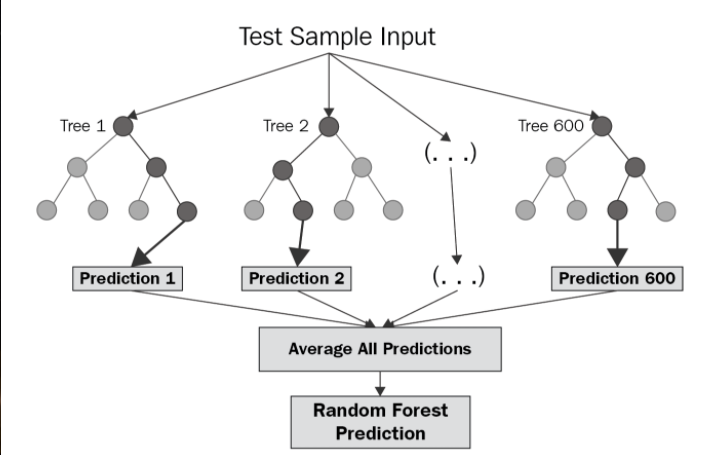

In [38]:
params = {
    "max_depth": 20,
    "max_features": "sqrt",
    "min_samples_leaf": 2,
    "min_samples_split": 2,
    "n_estimators": 200,
}
model = RandomForestRegressor(**params)
model.fit(X_train, y_train)
result = evaluate_model(model, X_train, y_train, X_test, y_test)
results.append(result)

Train Mean Absolute Error: 146629.0582874411
Train R2 Score: 0.7644324703089296
Train Root Mean Squared Error: 215975.60200133087
Test Mean Absolute Error: 218355.47610041132
Test R2 Score: 0.5302207344911478
Test Root Mean Squared Error: 323566.5172462014


### Visualize the results

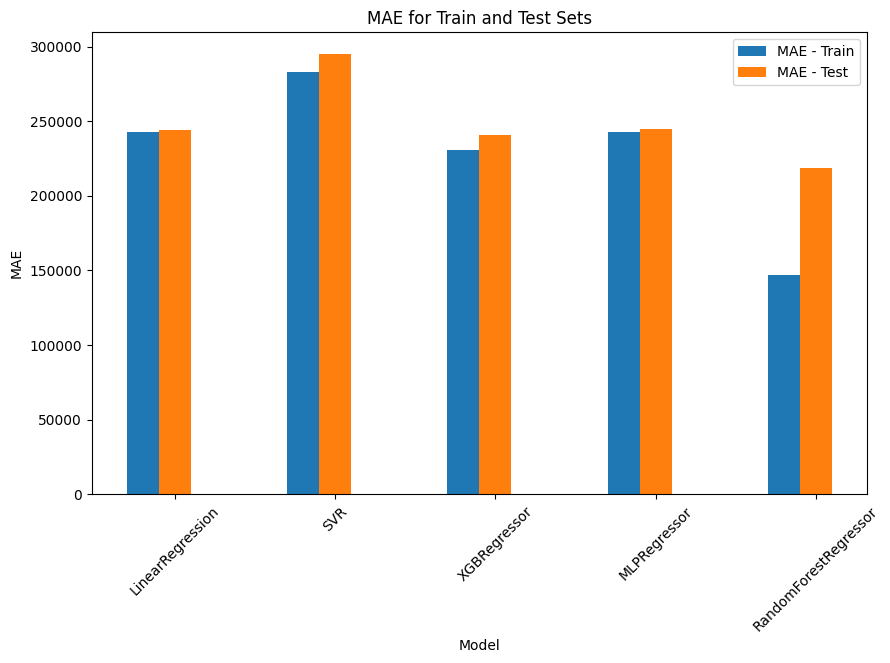

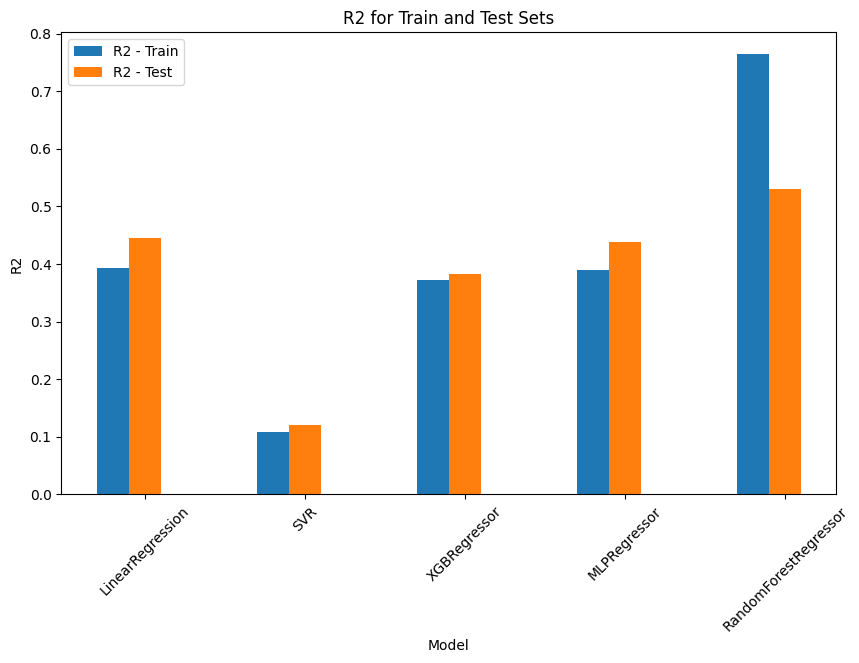

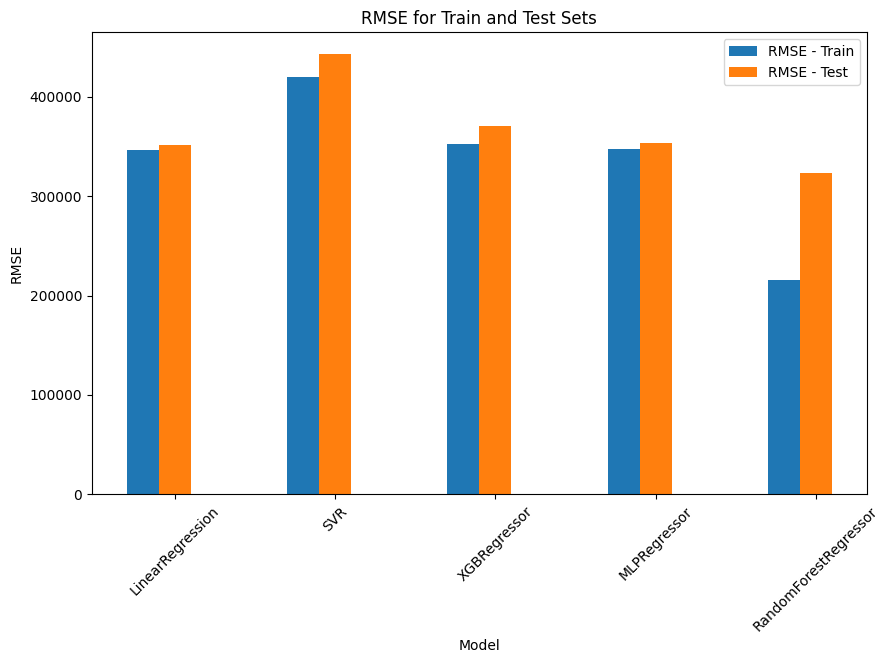

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting the error metrics from the results
models = []
mae_train = []
mae_test = []
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

for result in results:
    (
        model_name,
        mae_train_val,
        mae_test_val,
        r2_train_val,
        r2_test_val,
        rmse_train_val,
        rmse_test_val,
    ) = result
    models.append(model_name)
    mae_train.append(mae_train_val)
    mae_test.append(mae_test_val)
    r2_train.append(r2_train_val)
    r2_test.append(r2_test_val)
    rmse_train.append(rmse_train_val)
    rmse_test.append(rmse_test_val)

# Plotting MAE
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.2
plt.bar(x - width, mae_train, width, label="MAE - Train")
plt.bar(x, mae_test, width, label="MAE - Test")
plt.xticks(x, models, rotation=45)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE for Train and Test Sets")
plt.legend()
plt.show()

# Plotting R2
plt.figure(figsize=(10, 6))
plt.bar(x - width, r2_train, width, label="R2 - Train")
plt.bar(x, r2_test, width, label="R2 - Test")
plt.xticks(x, models, rotation=45)
plt.xlabel("Model")
plt.ylabel("R2")
plt.title("R2 for Train and Test Sets")
plt.legend()
plt.show()

# Plotting RMSE
plt.figure(figsize=(10, 6))
plt.bar(x - width, rmse_train, width, label="RMSE - Train")
plt.bar(x, rmse_test, width, label="RMSE - Test")
plt.xticks(x, models, rotation=45)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE for Train and Test Sets")
plt.legend()
plt.show()